In [2]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [3]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv("heart.csv")

# Preview the data
df.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
# Check if any columns have missing values
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
# Convert 'cp', 'thal', and 'slope' using one-hot encoding
df = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)


In [6]:
print(df.columns)


Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_1', 'cp_2', 'cp_3', 'thal_1', 'thal_2',
       'thal_3', 'slope_1', 'slope_2'],
      dtype='object')


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [8]:
X = df.drop('target', axis=1)
y = df['target']


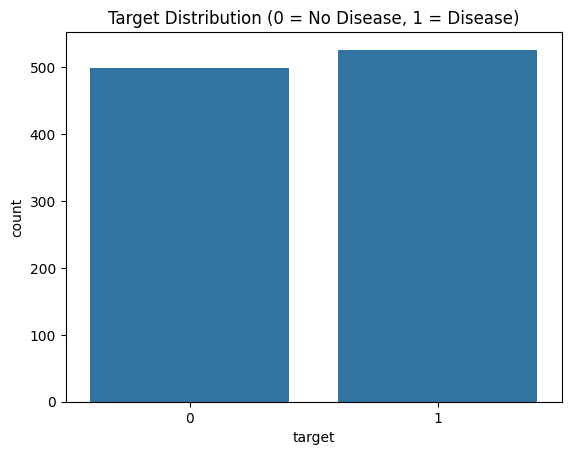

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()


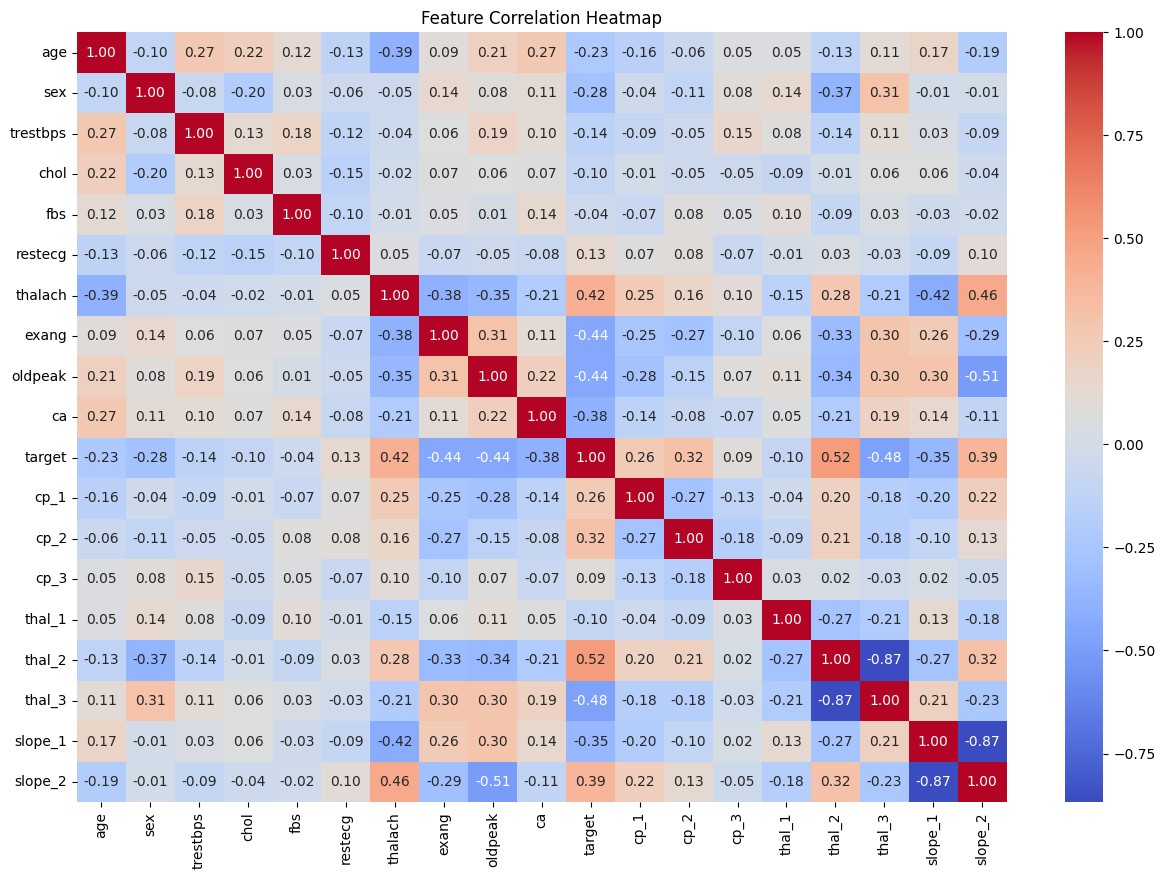

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


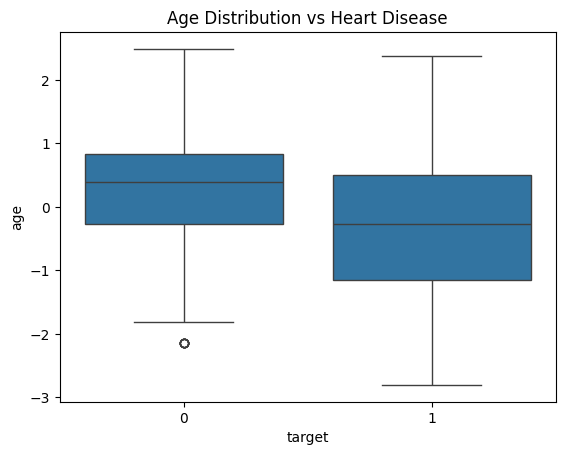

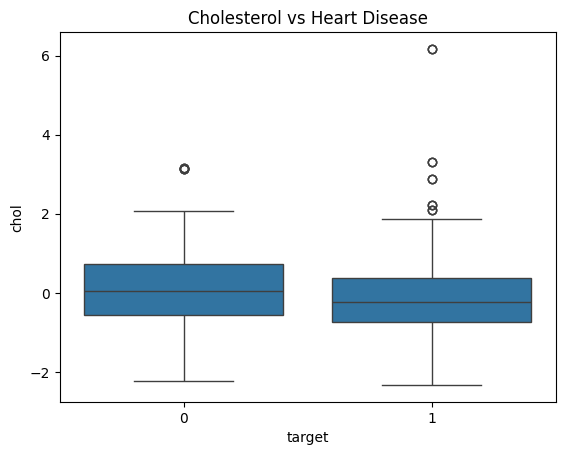

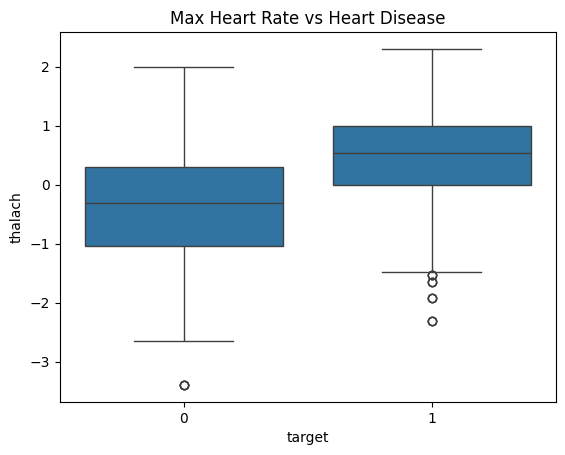

In [11]:
# Age vs Target
sns.boxplot(x='target', y='age', data=df)
plt.title("Age Distribution vs Heart Disease")
plt.show()

# Cholesterol vs Target
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()

# Max Heart Rate vs Target
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()



Train test split model

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       100
           1       0.82      0.91      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



Neural Network MLP

In [16]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
print("Neural Network Report:\n", classification_report(y_test, y_pred_mlp))


Neural Network Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_test, y_pred, model_name):
    print(f"\n🔍 Evaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [19]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_mlp, "Neural Network (MLP)")



🔍 Evaluation for Logistic Regression
Accuracy: 0.8536585365853658
Precision: 0.8205128205128205
Recall: 0.9142857142857143
F1 Score: 0.8648648648648649
Confusion Matrix:
 [[79 21]
 [ 9 96]]

🔍 Evaluation for Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[100   0]
 [  0 105]]

🔍 Evaluation for Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[100   0]
 [  0 105]]

🔍 Evaluation for Neural Network (MLP)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[100   0]
 [  0 105]]


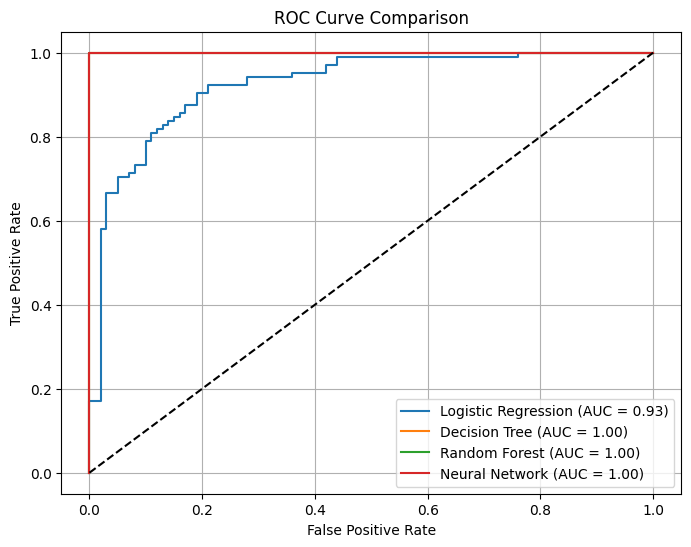

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8,6))
plot_roc(lr, X_test, y_test, "Logistic Regression")
plot_roc(dt, X_test, y_test, "Decision Tree")
plot_roc(rf, X_test, y_test, "Random Forest")
plot_roc(mlp, X_test, y_test, "Neural Network")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()


In [21]:
model_scores = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_mlp)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_mlp)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_mlp)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_mlp)
    ]
}

results_df = pd.DataFrame(model_scores)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.853659   0.820513  0.914286  0.864865
1        Decision Tree  1.000000   1.000000  1.000000  1.000000
2        Random Forest  1.000000   1.000000  1.000000  1.000000
3       Neural Network  1.000000   1.000000  1.000000  1.000000


 Feature Importance (Random Forest)

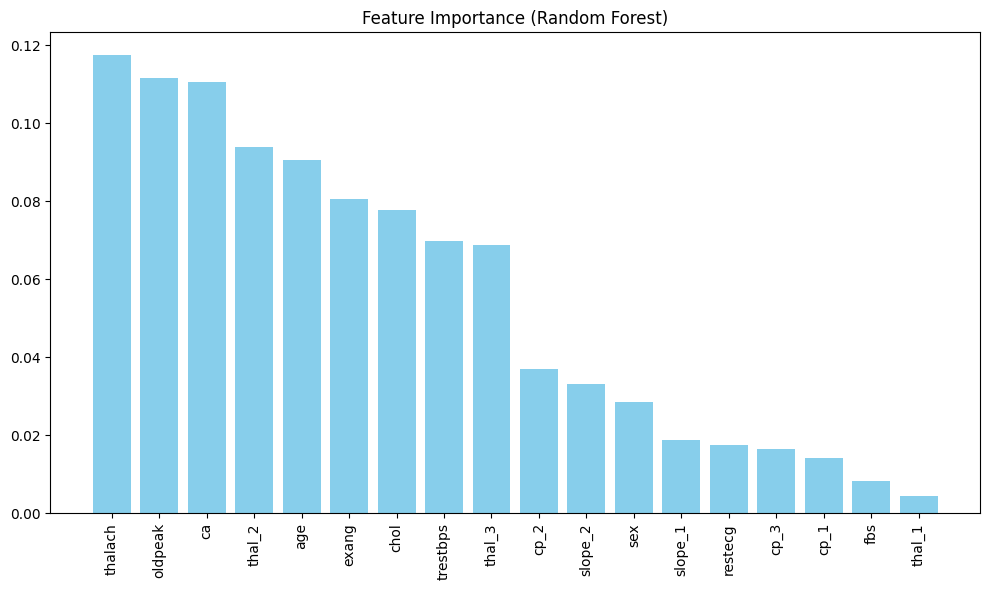

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [23]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
})

coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)
print(coefficients)


     Feature  Coefficient
11      cp_2     1.847018
12      cp_3     1.538002
1        sex    -1.280394
7      exang    -0.914027
10      cp_1     0.789719
14    thal_2     0.784398
9         ca    -0.782735
15    thal_3    -0.531268
8    oldpeak    -0.519974
16   slope_1    -0.509227
13    thal_1     0.498126
17   slope_2     0.366595
5    restecg     0.313549
6    thalach     0.305592
2   trestbps    -0.272197
3       chol    -0.256492
4        fbs     0.078388
0        age    -0.074165
